In [53]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
#Minimierung der Energiesensitivität

phi0 = 2.0678e-15
kb = 1.38e-23 
h = 6.626e-34
T = 20e-3
Ic = 6e-6
C = 0.95e-12
Ls = 147e-12
Lpar = 0.5e-9
Lm = 13.3e-9
Lp = Lm/2
Li = Lp+Lpar
kis = 0.75
sin = Li/(Li + Lpar + Lp)

def betaL(Ls):
    return 2*Ic*Ls/phi0

def betaC(Rs):
    return 2*np.pi*Ic*Rs**2*C/phi0

def ep(Rs,Ls):
    return kb*T*np.sqrt(betaL(Ls)*phi0*C/(2*Ic))*np.sqrt(np.pi*betaL(Ls)/betaC(Rs))*((1-kis**2*sin)**2+np.sqrt(2)*(1+betaL(Ls))**2/betaL(Ls)**2)*(2*Lpar+Lm)/(kis**2*sin**2*Lm)


In [66]:
ep_arrayR = np.array([])
Rs_array = np.linspace(1,30,100)
for r in Rs_array:
    ep_arrayR = np.append(ep_arrayR,ep(r,147e-12))
    
ep_arrayL = np.array([])
Ls_array = np.linspace(1,200,2000)*1e-12
for l in Ls_array:
    ep_arrayL = np.append(ep_arrayL,ep(6,l))

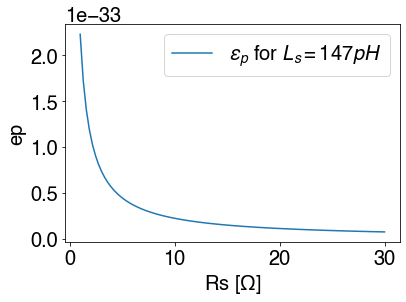

In [67]:
plt.rc('font', family='Helvetica', size=20)
plt.rc('mathtext',fontset='custom',rm='Helvetica',it='Helvetica:italic',default='it')
plt.plot(Rs_array, ep_arrayR, label=r"$\epsilon_p$ for $L_s=147pH$")
plt.xlabel("Rs [$\Omega$]")
plt.ylabel("ep")
plt.legend()

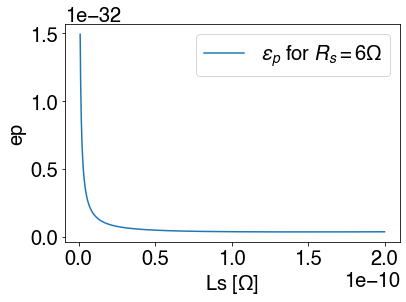

In [68]:
plt.plot(Ls_array, ep_arrayL, label=r"$\epsilon_p$ for $R_s=6\Omega$")
plt.xlabel("Ls [$\Omega$]")
plt.ylabel("ep")
plt.legend()

Text(0.5, 0, 'ep')

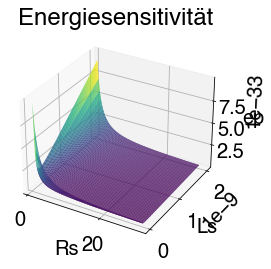

In [69]:
#%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')

Ls_array = np.linspace(10,2000,100)*1e-12

x = Rs_array
y = Ls_array
X, Y = np.meshgrid(x, y)
Z = ep(X, Y)


ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Energiesensitivität')
ax.set_xlabel('Rs')
ax.set_ylabel('Ls')
ax.set_zlabel('ep')

In [75]:
ep(6.3,147e-12)/h

0.5342731222881488

In [71]:
C=0.23e-12
betaC(12.9)

0.6977981992530716

In [72]:
C=0.95e-12
betaC(6.35)

0.6983829748659776

In [73]:
betaL(147e-12)

0.8530805687203791